In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Attributes:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 
10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-
inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, 
Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, 
Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-
Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- class: >50K, <=50K

In [2]:
DATASET_PATH = 'adult.data'

columns = ['age',
           'workclass',
           'fnlwgt',
           'education',
           'education_num',
           'marital_status',
           'occupation', 
           'relationship', 
           'race',
           'sex',
           'capital_gain',
           'capital_loss', 
           'hours_per_week',
           'native_country',
           'class']

In [3]:
df = pd.read_csv(DATASET_PATH, header=None)
df.columns = columns

In [4]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(32561, 15)

In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
class             0
dtype: int64

In [7]:
category_columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'class']
for column in category_columns:
    df[column] = df[column].astype('category')
    df[column] = df[column].cat.codes

In [8]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [9]:
y = df['class']
x = df.drop(['class'], axis=1)

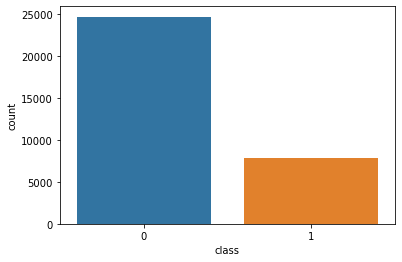

In [18]:
sns.countplot(x=y, label='Count')
plt.show()

In [37]:
def reg_violin_plot(x, y, start, end):
    data = x
    data_std = (data - data.mean()) / data.std()
    data = pd.concat([y, data_std.iloc[:, start:end]], axis=1)
    data = pd.melt(data, id_vars=['class'], var_name='features', value_name='targets')
    
    plt.figure(figsize=(10, 10))
    sns.violinplot(x='features', y='targets', hue='class', data=data, split=True, inner='quart')
    plt.xticks(rotation=45)
    
    plt.show()

In [46]:
def class_violin_plot(x, y, start, end):
    data = x
    data = pd.concat([y, data.iloc[:, start:end]], axis=1)
    data = pd.melt(data, id_vars=['class'], var_name='features', value_name='targets')
    
    plt.figure(figsize=(10, 10))
    sns.violinplot(x='features', y='targets', hue='class', data=data, split=True, inner='quart')
    plt.xticks(rotation=45)
    
    plt.show()

In [38]:
def reg_box_plot(x, y, start, end):
    data = x
    data_std = (data - data.mean()) / data.std()
    data = pd.concat([y, data_std.iloc[:, start:end]], axis=1)
    data = pd.melt(data, id_vars=['class'], var_name='features', value_name='targets')
    
    plt.figure(figsize=(10, 10))
    sns.boxplot(x='features', y='targets', hue='class', data=data)
    plt.xticks(rotation=45)
    
    plt.show()

In [54]:
def class_box_plot(x, y, start, end):
    data = x
    data_std = (data - data.mean()) / data.std()
    data = pd.concat([y, data_std.iloc[:, start:end]], axis=1)
    data = pd.melt(data, id_vars=['class'], var_name='features', value_name='targets')
    
    plt.figure(figsize=(10, 10))
    sns.boxplot(x='features', y='targets', hue='class', data=data)
    plt.xticks(rotation=45)
    
    plt.show()

In [44]:
continues_columns = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
categorical_columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

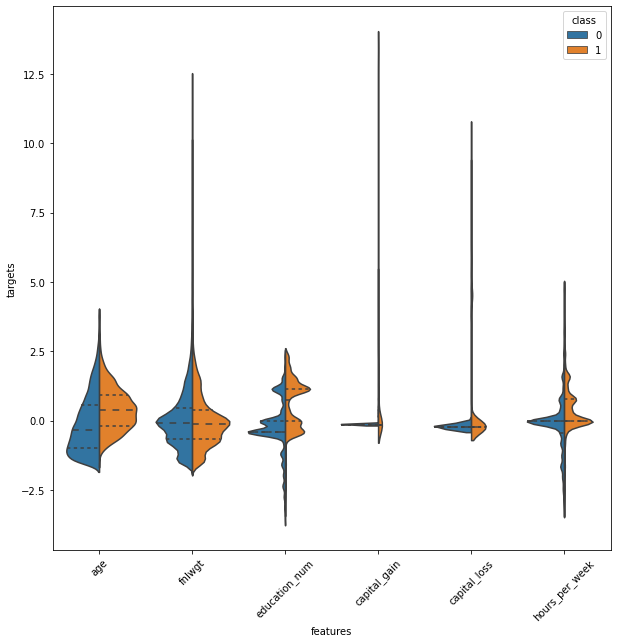

In [40]:
reg_violin_plot(x[continues_columns], y, 0, 7)

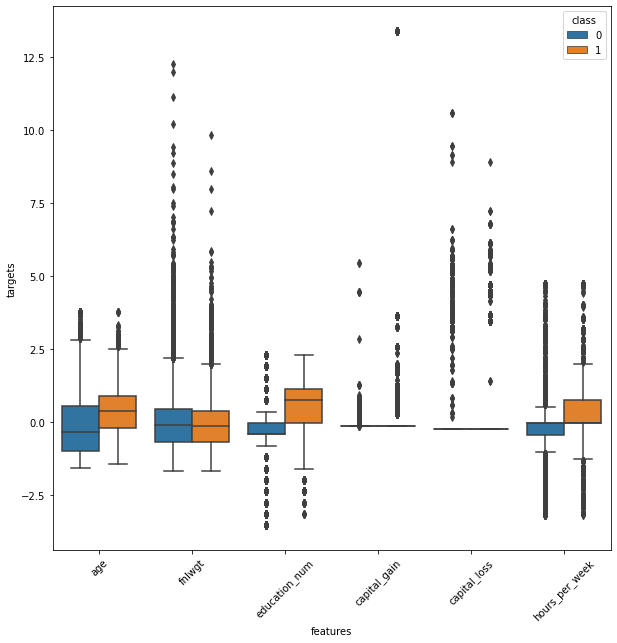

In [41]:
reg_box_plot(x[continues_columns], y, 0, 7)

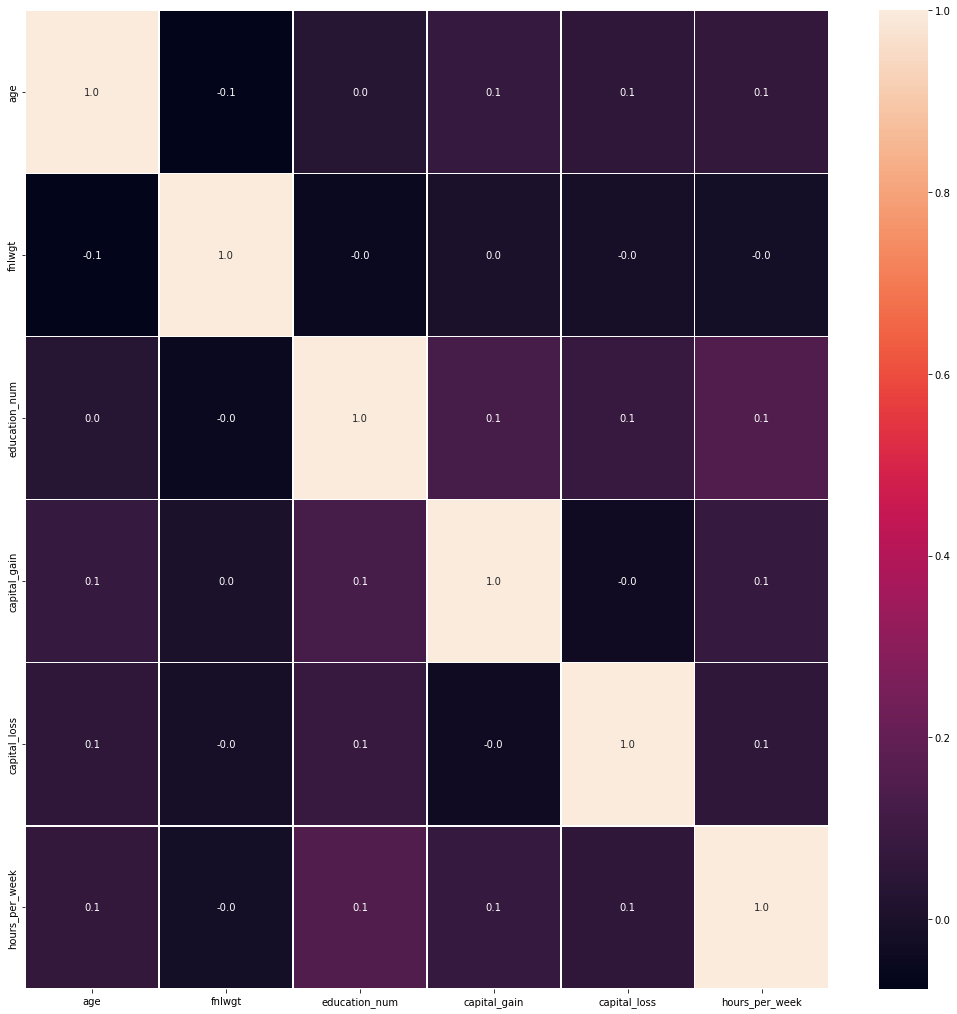

In [42]:
f, ax = plt.subplots(figsize=(18, 18))

sns.heatmap(x[continues_columns].corr(), annot=True, linewidth=.5, fmt='.1f', ax=ax)
plt.show()

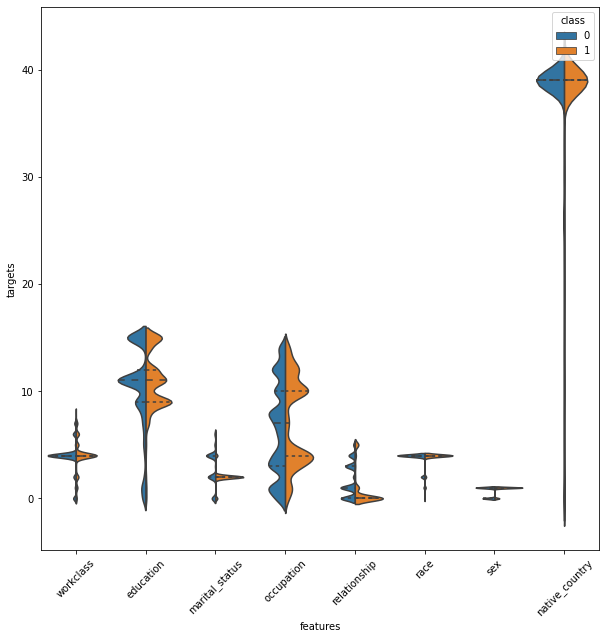

In [49]:
class_violin_plot(x[categorical_columns], y, 0, 8)

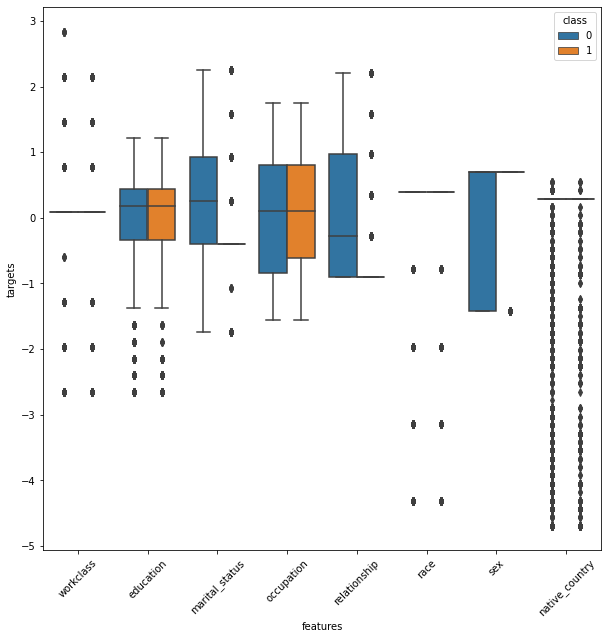

In [55]:
class_box_plot(x[categorical_columns], y, 0, 8)

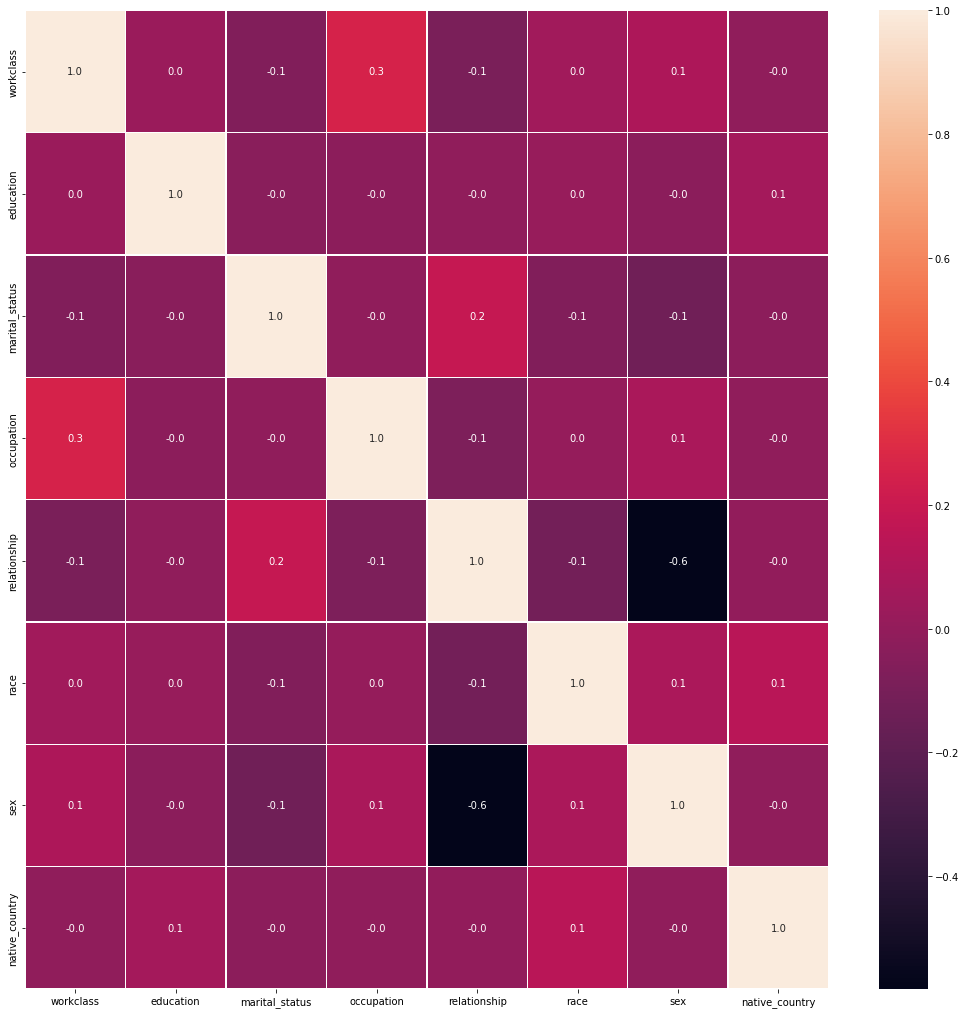

In [56]:
f, ax = plt.subplots(figsize=(18, 18))

sns.heatmap(x[categorical_columns].corr(), annot=True, linewidth=.5, fmt='.1f', ax=ax)
plt.show()

Notes:
- This dataset is imbalanced
- Data has a non-linear dependence